<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/Time_series_cycle_hiring_samanvitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SAMANVITHA BOLEM, 38110492**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import statsmodels.api as sm
% matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/Avg_Monthly_Cycle_Hiring_Count.csv',
                   index_col='Year_Month',
                   parse_dates=True)
data.head()

,Cycle_Hiring_Count
Year_Month,
2001-01-01,648
2001-02-01,646
2001-03-01,639
2001-04-01,654
2001-05-01,630


In [3]:
data.dtypes

Cycle_Hiring_Count    int64
dtype: object

In [4]:
data['Cycle_Hiring_Count'].isna().sum()

0

**INDEXING DATA**

In [5]:
y = data['Cycle_Hiring_Count'].resample('MS').mean()
y

Year_Month
2001-01-01     648
2001-02-01     646
2001-03-01     639
2001-04-01     654
2001-05-01     630
              ... 
2010-02-01    1425
2010-03-01    1419
2010-04-01    1432
2010-05-01    1394
2010-06-01    1327
Freq: MS, Name: Cycle_Hiring_Count, Length: 114, dtype: int64

In [6]:
y['2001']

Year_Month
2001-01-01    648
2001-02-01    646
2001-03-01    639
2001-04-01    654
2001-05-01    630
2001-06-01    622
2001-07-01    617
2001-08-01    613
2001-09-01    661
2001-10-01    695
2001-11-01    690
2001-12-01    707
Freq: MS, Name: Cycle_Hiring_Count, dtype: int64

In [7]:
y['2010':]

Year_Month
2010-01-01    1461
2010-02-01    1425
2010-03-01    1419
2010-04-01    1432
2010-05-01    1394
2010-06-01    1327
Freq: MS, Name: Cycle_Hiring_Count, dtype: int64

**DATA VIZUALIZATION**

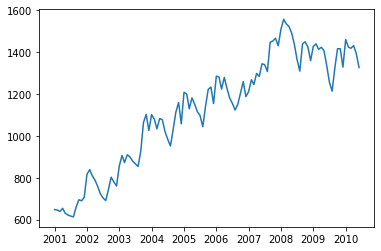

In [8]:
plt.plot(data['Cycle_Hiring_Count'])

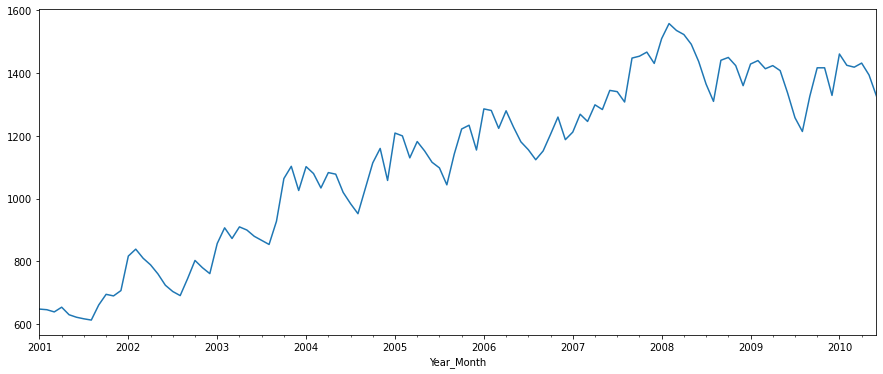

In [9]:
y.plot(figsize=(15, 6))

In [10]:
import statsmodels.api as sm

In [11]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

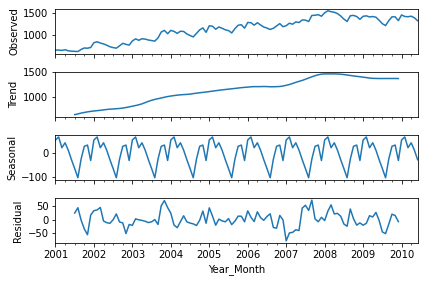

In [12]:
decomposition.plot()
plt.show()

### **ARIMA MODEL**

In [13]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1916.6020925308567
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1617.00473269756
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1276.4294067845128
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1125.2265194713814
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1260.8988169078123
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1249.9817628681121
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1133.5713080385915
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1084.534091023443
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1757.6161400874023
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1476.0631148800157
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1159.3965428811014
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1025.2716005589673
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1162.9913458000412
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1141.7463770434927
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1045.9862430714745
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:993.7833552323078
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1226.3255871329823
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1061.1440097606762
ARIMA(0, 1, 0)x(0, 1, 0, 12) - A

In [15]:
# Training the model.
model = sm.tsa.statespace.SARIMAX(y, 
                                  order=(1, 1, 1), 
                                  seasonal_order=(1, 1, 1, 12), 
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0273      1.760      0.016      0.988      -3.422       3.477
ma.L1         -0.0948      1.763     -0.054      0.957      -3.550       3.360
ar.S.L12       0.1383      0.102      1.355      0.176      -0.062       0.338
ma.S.L12      -1.0000      0.153     -6.529      0.000      -1.300      -0.700
sigma2       985.2346      0.000   6.34e+06      0.000     985.234     985.235


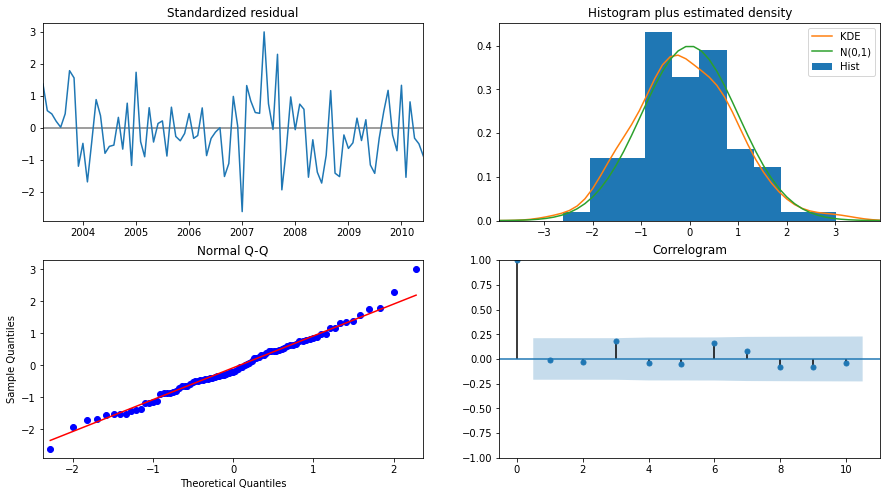

In [16]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

            lower Cycle_Hiring_Count  upper Cycle_Hiring_Count
Year_Month                                                    
2001-01-01              -3394.757202               3394.757202
2001-02-01              -2118.931037               3426.739678
2001-03-01              -2126.699993               3418.807294
2001-04-01              -2133.848304               3411.658953
2001-05-01              -2118.550475               3426.956782
...                              ...                       ...
2010-02-01               1410.892884               1541.400170
2010-03-01               1326.490602               1456.910337
2010-04-01               1377.221599               1507.641262
2010-05-01               1345.083109               1475.502771
2010-06-01               1291.012590               1421.432252

[114 rows x 2 columns]


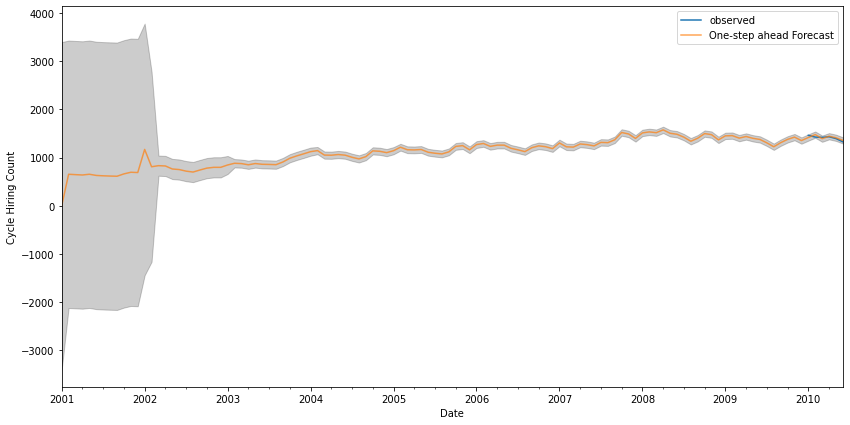

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2001-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cycle Hiring Count')
plt.legend()
plt.show()

In [18]:
y_predicted = pred.predicted_mean
y_true = y['2010-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 1099.7759


In [19]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 33.16286925676902


### FUTURE FORECASTS

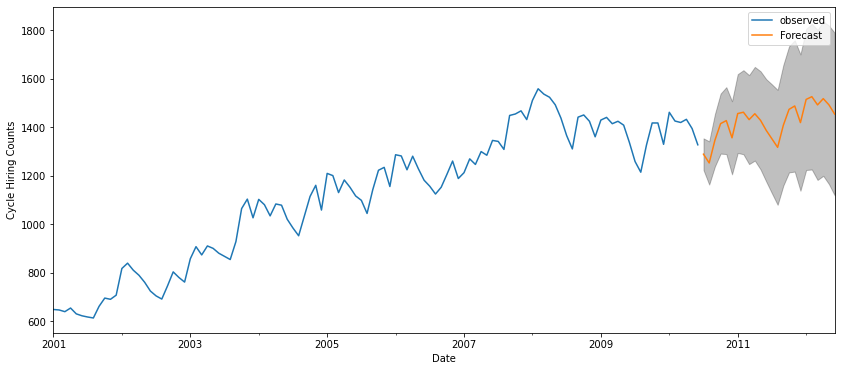

In [20]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cycle Hiring Counts')
plt.legend()
plt.show()